In [1]:
import numpy as np
import re

In [2]:
f = open("./Dataset.data")
data = f.read()
data

'1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult male   yes\n1st  adult

In [3]:
data = data.split("\n")
data = data[:-1]
data

['1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult male   yes',
 '1st  adult

In [4]:
def data_split(data):
    data = re.sub("\s+"," ",data) #xóa các khoảng trắng dư thừa
    data = data.split()           #tách chuỗi bằng các khoảng trắng
    data = np.array([data])
    return data
data_split(data[0])

array([['1st', 'adult', 'male', 'yes']], dtype='<U5')

In [5]:
data_np = data_split(data[0])
for i, d in enumerate(data):
    data_np = np.concatenate((data_np,data_split(d)), axis = 0)
data_np

array([['1st', 'adult', 'male', 'yes'],
       ['1st', 'adult', 'male', 'yes'],
       ['1st', 'adult', 'male', 'yes'],
       ...,
       ['crew', 'adult', 'female', 'no'],
       ['crew', 'adult', 'female', 'no'],
       ['crew', 'adult', 'female', 'no']], dtype='<U6')

In [6]:
data_np.shape

(2202, 4)

In [7]:
data_np[:, 0][np.where(data_np[:, 0] == '1st')] = 0
data_np[:, 0][np.where(data_np[:, 0] == '2nd')] = 1
data_np[:, 0][np.where(data_np[:, 0] == '3rd')] = 2
data_np[:, 0][np.where(data_np[:, 0] == 'crew')] = 3

In [8]:
data_np[:, 1][np.where(data_np[:, 1] == 'adult')] = 0
data_np[:, 1][np.where(data_np[:, 1] == 'child')] = 1

In [9]:
data_np[:, 2][np.where(data_np[:, 2] == 'male')] = 0

In [10]:
data_np[:, 2][np.where(data_np[:, 2] == 'female')] = 1

In [11]:
data_np[:, 3][np.where(data_np[:, 3] == 'yes')] = 0
data_np[:, 3][np.where(data_np[:, 3] == 'no')] = 1

In [12]:
data_np

array([['0', '0', '0', '0'],
       ['0', '0', '0', '0'],
       ['0', '0', '0', '0'],
       ...,
       ['3', '0', '1', '1'],
       ['3', '0', '1', '1'],
       ['3', '0', '1', '1']], dtype='<U6')

In [13]:
data_np = np.array(data_np,dtype=np.int)
data_np

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [3, 0, 1, 1],
       [3, 0, 1, 1],
       [3, 0, 1, 1]])

In [14]:
ntraining = int(0.8 * data_np.shape[0])
np.random.shuffle(data_np)             # trộn bộ dữ liệu trước khi phân chia
training_att = data_np[0:ntraining, 0:3]
testing_att = data_np[ntraining:,0:3]
training_label = data_np[0:ntraining,3]
testing_label = data_np[ntraining:,3]


In [15]:
training_att.shape


(1761, 3)

In [16]:
def predict(x,k):
    """
    dự đoán nhãn mới của 1 điểm dữ liệu x bằng thuật toán k-NN
    """
    
    distance = (x-training_att)
    distance = np.linalg.norm(distance,axis = 1) # tính toán khoảng cách từ điểm cần 
                                                # dự đoán đến toàn bộ dữ liệu trong tập train     
                                   
    indices = np.argsort(distance)             
    nearest = indices[0:k]         # lấy chỉ số của những điểm dữ liệu gần với x nhất  
    
    # đếm những điểm dữ liệu mà nhãn là 0 trong tập nearest
    dem0 = 0
    for i in nearest:
        if training_label[i] == 0:
            dem0 += 1
    dem1 = k - dem0
    
    # quyết định nhãn mới của điểm dữ liệu cần dự đoán
    if dem0 > dem1:
        return 0
    else:
        return 1
predict(testing_att[6],k=3)

1

In [17]:
testing_label

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,

In [18]:
training_att

array([[3, 0, 0],
       [2, 0, 0],
       [3, 0, 0],
       ...,
       [2, 0, 1],
       [2, 0, 0],
       [3, 0, 0]])

In [20]:
# thực hiện dự đoán trên tập testing và đếm số lượng điểm dự đoán chính xác
def testAll(k):
    dem =0 
    for i, t in enumerate(testing_att):
        if predict(t,k)==testing_label[i]:
            dem += 1

    # in ra tỷ lệ điểm dự đoán chính xác
    return dem / testing_label.shape[0] * 100 

testAll(k = 3)

80.04535147392289

In [21]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'percent')

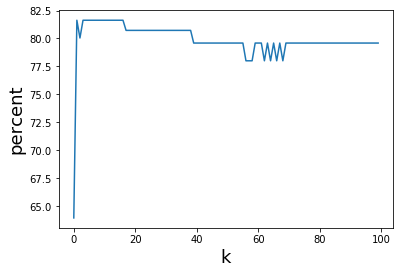

In [22]:
list_acc = []
for k in range(1,101):
    list_acc.append(testAll(k))
    
plt.plot(list_acc)
plt.xlabel('k',fontsize=18)
plt.ylabel('percent',fontsize=18)

In [24]:
testAll(3)

80.04535147392289

In [25]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'percent')

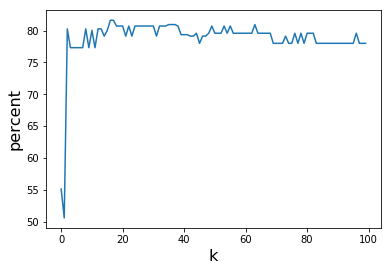

In [26]:
# sử dụng thư viện KNeighborsClassifier từ sklearn.neighbors 
list_acc = []
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_att,training_label)
    list_acc.append(knn.score(testing_att,testing_label)*100)
plt.plot(list_acc)
plt.xlabel('k',fontsize=16)
plt.ylabel('percent',fontsize=16)

In [33]:
list_acc[5]

77.32426303854876

In [35]:
#Naive bayes với sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics as sk_metrics

gnb = GaussianNB()
gnb.fit(training_att,training_label)
gnb_predictions = gnb.predict(testing_att)
sk_metrics.accuracy_score(testing_label, gnb_predictions)

0.7845804988662132